# TEAM-4

* Vighneshwar Jaiswal
* Pawan Mathur
* Anujay Saraf
* Rohan Damodar

# Problem Statement.
* Predict whether a particular  company  will  default  within  5   years,  given its numerical financial  statement  data

#### The  dataset  is  about  bankruptcy  prediction  of  Polish  companies.  The  data  was  collected  from Emerging  Markets  Information  Service,  which  is  a   database  containing  information  on  emerging  markets around  the  world. 
> Dataset Link : https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

#        What is Bankruptcy

##### Bankruptcy is a legal proceeding involving a person or business that is unable to repay outstanding debts. 


##### All of the debtor's assets are measured and evaluated, and the assets may be used to repay a portion of outstanding debt [Investopedia]


## Altman’s method - Z-Score [Investopedia]
### Bankruptcy is a function of 

* Working capital / total assets
* Retained earnings / total assets
* Earnings before interest and tax / total assets
* Market value of equity / total liabilities
* sales / total assets

### Incorporating these into our analysis didn't improve our model performance. 

#  The Data
* Data from five years 
*  Bankruptcy prediction of Polish companies.
*  Problem :  to predict whether a company will go bankrupt between 5 years, 

## Therefore : All 5 years data could be combined !

# Creating a consolidated dataframe

In [1]:
from scipy.io import arff # Since the file type was arff
import pandas as pd

In [2]:
data1 = arff.loadarff('data/1year.arff')
data2 = arff.loadarff('data/2year.arff')
data3 = arff.loadarff('data/3year.arff')
data4 = arff.loadarff('data/4year.arff')
data5 = arff.loadarff('data/5year.arff')

d1 = pd.DataFrame(data1[0])
d2 = pd.DataFrame(data2[0])
d3 = pd.DataFrame(data3[0])
d4 = pd.DataFrame(data4[0])
d5 = pd.DataFrame(data5[0])

final_df = d1.append([d2,d3,d4,d5])

# Describe the DataFrame

In [3]:
final_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
Attr1     43397 non-null float64
Attr2     43397 non-null float64
Attr3     43397 non-null float64
Attr4     43271 non-null float64
Attr5     43316 non-null float64
Attr6     43397 non-null float64
Attr7     43397 non-null float64
Attr8     43311 non-null float64
Attr9     43396 non-null float64
Attr10    43397 non-null float64
Attr11    43361 non-null float64
Attr12    43271 non-null float64
Attr13    43278 non-null float64
Attr14    43397 non-null float64
Attr15    43369 non-null float64
Attr16    43310 non-null float64
Attr17    43311 non-null float64
Attr18    43397 non-null float64
Attr19    43277 non-null float64
Attr20    43278 non-null float64
Attr21    37551 non-null float64
Attr22    43397 non-null float64
Attr23    43278 non-null float64
Attr24    42483 non-null float64
Attr25    43397 non-null float64
Attr26    43310 non-null float64
Attr27    40641 non-null float64
A

# Check class imbalance

In [5]:
# Class Imbalance

final_df.groupby('class').count()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
class,,,,,,,,,,,,,,,,,,,,,
0,41307,41307,41307,41186,41225,41307,41307,41225,41306,41307,...,41313,41198,41309,41237,41309,39338,41220,41198,41186,40582
1,2090,2090,2090,2085,2091,2090,2090,2086,2090,2090,...,2091,2080,2089,2084,2089,1915,2083,2080,2085,2011


# Handle Outliers

In [6]:
# Replacing outliers with quantile limit

for col in final_df.columns.values:
    if(col != 'class'):
        final_df.loc[final_df[col] > final_df[col].quantile(q=0.95), col] = final_df[col].quantile(q=0.95)
        final_df.loc[final_df[col] < final_df[col].quantile(q=0.05), col] = final_df[col].quantile(q=0.05)

# Handle Missing Values

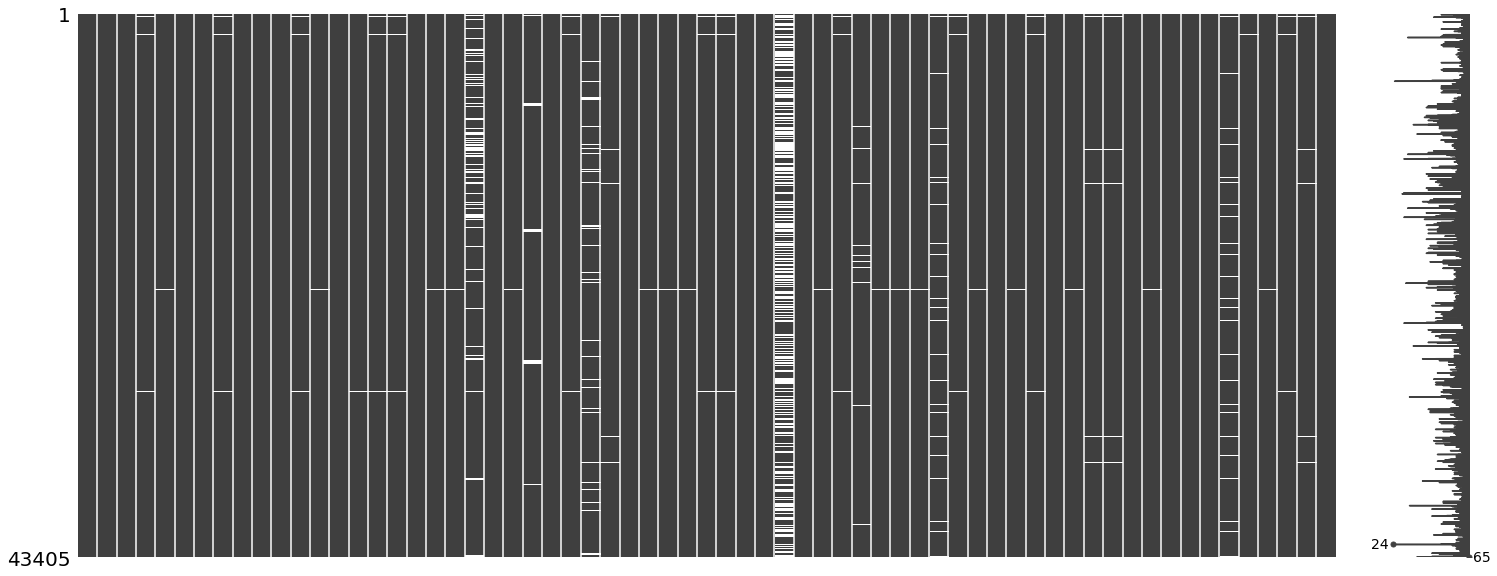

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

msno.matrix(final_df)

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = final_df.iloc[:,0:-1]
y = final_df['class'].map(lambda x: 1 if x == '1' else 0).values 
# did this ^ because, without this mask, was getting below error on metric calculations
# ValueError: pos_label=1 is not a valid label: array(['0', '1'], dtype='|S1')

In [9]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='mean', axis=0) 
print X.isnull().values.any()

X_imputed = pd.DataFrame(imp.fit_transform(X))

print X_imputed.isnull().values.any()

True
False


# Feature selection

# 1. Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.102544,-0.411463,0.691112,-0.162473,0.225250,1.911668,1.266173,-0.308039,-0.526208,0.049464,...,3.237097,0.371909,0.838375,-0.403053,-0.536961,-0.454037,-0.551024,-0.124972,-0.449524,-0.203463
1,1.171761,0.037100,0.970564,-0.210181,0.086178,-0.184727,1.329176,-0.424252,0.069188,0.022997,...,-0.238051,0.366522,0.917630,-0.611516,-0.541628,-0.625190,-0.828642,0.234920,-0.640437,3.049112
2,1.491114,0.767651,0.214747,-0.391658,-0.040015,-0.184727,1.701615,-0.618489,-0.345582,-0.703543,...,0.198291,1.344692,2.297728,-1.335892,1.143760,-0.591408,-0.727692,0.627285,-0.768521,-0.338274
3,0.140877,-0.680407,0.920967,0.044930,0.380442,0.624566,0.112903,-0.121953,-0.613070,0.306602,...,1.737831,-0.182679,-0.046863,0.162561,-0.541628,-0.608105,-0.777780,-0.069921,-0.485797,-0.317511
4,0.995690,0.459503,0.076458,-0.460777,-0.088791,0.826727,0.807673,-0.551174,-0.508156,-0.393545,...,-0.142509,0.477121,1.140718,-0.510365,-0.239789,-0.534953,-0.673360,0.524384,-0.740198,-0.174902


# 2.  ExtraTreesClassifier + SelectFromModel

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              n_jobs=-1,
                              random_state=9)
forest = forest.fit(X_scaled, y)

In [12]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(X_scaled)
X_new.shape

(43405, 18)

In [13]:
from operator import itemgetter

importances = list(zip(forest.feature_importances_, final_df.columns))

important_features = sorted(importances,key=itemgetter(0),reverse=True)
for i in range(0,18):
    print important_features[i]

(0.079921087439511124, 'Attr27')
(0.029013643432385439, 'Attr46')
(0.027601315955996845, 'Attr58')
(0.024217519282636945, 'Attr34')
(0.022750419143824179, 'Attr24')
(0.0219527028903473, 'Attr56')
(0.01756633244736534, 'Attr35')
(0.017451643413289922, 'Attr9')
(0.017447800072661085, 'Attr39')
(0.016995074174854467, 'Attr29')
(0.016905620457719348, 'Attr61')
(0.016884319546448166, 'Attr5')
(0.016717650408329152, 'Attr55')
(0.016567758871653421, 'Attr44')
(0.016280794539952268, 'Attr25')
(0.016133710730448603, 'Attr6')
(0.015832542998332415, 'Attr47')
(0.01565921990539175, 'Attr36')


- Note:
> The ExtraTreesClassifier with SelectFromModel is used to select the best features from the feature set

# Dataframe with selected features

# Train Test Split ( again )

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3,random_state=9)

In [15]:
print "class ratio train ",(y_train.shape/y_train.sum())
print "class ration test ",(y_test.shape/y_test.sum())

class ratio train  [21]
class ration test  [19]


# Import

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
import numpy as np

# Initial Performance

In [18]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
print "f1_score\t:", f1_score(y_test,rf1.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf1.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf1.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf1.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf1.predict(X_test))

 f1_score	: 0.534482758621
precision_score	: 0.911764705882
recall_score	: 0.378048780488
roc_auc_score	: 0.882505705061
confusion_matrix:
[[12342    24]
 [  408   248]]


In [19]:
lr1 = LogisticRegression(random_state=9)
lr1.fit(X_train, y_train)
print "f1_score\t:", f1_score(y_test,lr1.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr1.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr1.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr1.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr1.predict(X_test))

f1_score	: 0.00606980273141
precision_score	: 0.666666666667
recall_score	: 0.0030487804878
roc_auc_score	: 0.762439571721
confusion_matrix:
[[12365     1]
 [  654     2]]


# Undersampling

# 1. RandomUnderSampler

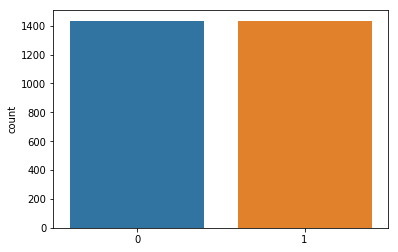

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Create the samplers
rus = RandomUnderSampler(random_state=9)
X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
sns.countplot(y_sample2)

In [22]:
rf2 = RandomForestClassifier(random_state=9)
rf2.fit(X_sample2, y_sample2)
print "f1_score\t:", f1_score(y_test,rf2.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf2.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf2.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf2.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf2.predict(X_test))

 f1_score	: 0.358260869565
precision_score	: 0.232086525462
recall_score	: 0.78506097561
roc_auc_score	: 0.903659609058
confusion_matrix:
[[10662  1704]
 [  141   515]]


In [23]:
lr2 = LogisticRegression(random_state=9)
lr2.fit(X_sample2, y_sample2)
print "f1_score\t:", f1_score(y_test,lr2.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr2.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr2.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr2.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr2.predict(X_test))

f1_score	: 0.190960912052
precision_score	: 0.110197368421
recall_score	: 0.71493902439
roc_auc_score	: 0.762742329479
confusion_matrix:
[[8579 3787]
 [ 187  469]]


# 2. Cluster Centroids

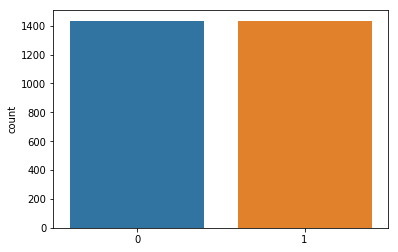

In [25]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=9)
X_sample3, y_sample3 = cc.fit_sample(X_train,y_train)
sns.countplot(y_sample3)

In [26]:
rf3 = RandomForestClassifier(random_state=9)
rf3.fit(X_sample3, y_sample3)
print "f1_score\t:", f1_score(y_test,rf3.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf3.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf3.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf3.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf3.predict(X_test))

f1_score	: 0.203437390389
precision_score	: 0.114942528736
recall_score	: 0.884146341463
roc_auc_score	: 0.854691068745
confusion_matrix:
[[7900 4466]
 [  76  580]]


In [27]:
lr3 = LogisticRegression(random_state=9)
lr3.fit(X_sample3, y_sample3)
print "f1_score\t:", f1_score(y_test,lr3.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr3.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr3.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr3.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr3.predict(X_test))

f1_score	: 0.159489633174
precision_score	: 0.0890630566441
recall_score	: 0.762195121951
roc_auc_score	: 0.745117168239
confusion_matrix:
[[7252 5114]
 [ 156  500]]


# TomekLinks

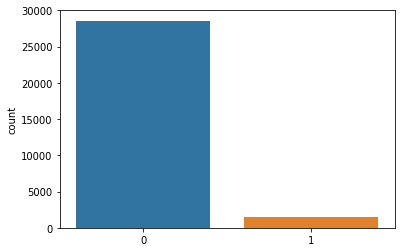

In [28]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(random_state=9, ratio='not minority')
X_sample4, y_sample4 = tl.fit_sample(X_train, y_train)
sns.countplot(y_sample4)

In [29]:
rf4 = RandomForestClassifier(random_state=9)
rf4.fit(X_sample4, y_sample4)
print "f1_score\t:", f1_score(y_test,rf4.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf4.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf4.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf4.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf4.predict(X_test))

f1_score	: 0.556854410202
precision_score	: 0.919298245614
recall_score	: 0.399390243902
roc_auc_score	: 0.885476700473
confusion_matrix:
[[12343    23]
 [  394   262]]


In [30]:
lr4 = LogisticRegression(random_state=9)
lr4.fit(X_sample4, y_sample4)
print "f1_score\t:", f1_score(y_test,lr4.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr4.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr4.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr4.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr4.predict(X_test))

f1_score	: 0.00606980273141
precision_score	: 0.666666666667
recall_score	: 0.0030487804878
roc_auc_score	: 0.762609071688
confusion_matrix:
[[12365     1]
 [  654     2]]


# OverSampling

# 1. RandomOverSampler

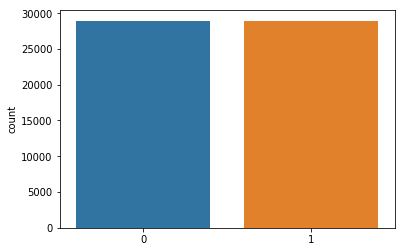

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9)
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)

In [32]:
rf5 = RandomForestClassifier(random_state=9)
rf5.fit(X_sample5, y_sample5)
print "f1_score\t:", f1_score(y_test,rf5.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf5.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf5.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf5.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf5.predict(X_test))

f1_score	: 0.574317492417
precision_score	: 0.852852852853
recall_score	: 0.432926829268
roc_auc_score	: 0.906950497134
confusion_matrix:
[[12317    49]
 [  372   284]]


In [33]:
lr5 = LogisticRegression(random_state=9)
lr5.fit(X_sample5, y_sample5)
print "f1_score\t:", f1_score(y_test,lr5.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr5.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr5.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr5.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr5.predict(X_test))

f1_score	: 0.191212367779
precision_score	: 0.110328638498
recall_score	: 0.716463414634
roc_auc_score	: 0.765118780646
confusion_matrix:
[[8576 3790]
 [ 186  470]]


# 2. SMOTE

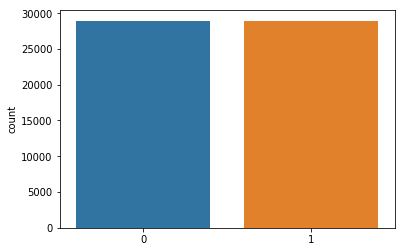

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9, kind="borderline2")
X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample6)

In [35]:
rf6 = RandomForestClassifier(random_state=9)
rf6.fit(X_sample6, y_sample6)
print "f1_score\t:", f1_score(y_test,rf6.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf6.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf6.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf6.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf6.predict(X_test))

f1_score	: 0.523480662983
precision_score	: 0.478535353535
recall_score	: 0.577743902439
roc_auc_score	: 0.907593117734
confusion_matrix:
[[11953   413]
 [  277   379]]


In [36]:
lr6 = LogisticRegression(random_state=9)
lr6.fit(X_sample6, y_sample6)
print "f1_score\t:", f1_score(y_test,lr6.predict(X_test))
print "precision_score\t:",precision_score(y_test, lr6.predict(X_test))
print "recall_score\t:",recall_score(y_test, lr6.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, lr6.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, lr6.predict(X_test))

f1_score	: 0.194420963652
precision_score	: 0.112855740922
recall_score	: 0.701219512195
roc_auc_score	: 0.764553205485
confusion_matrix:
[[8750 3616]
 [ 196  460]]


# Algorithmic Approach

In [41]:
class_wts = range(50)
f1s = []
auc = []
for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=9, class_weight={0:wt,1:1})
    rf7.fit(X_train, y_train)
    f1s.append(f1_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict_proba(X_test)[:,1]))

In [42]:
max_scorer = f1s.index(np.max(f1s))
rf7 = RandomForestClassifier(random_state=9, class_weight={0:max_scorer,1:1})
rf7.fit(X_train, y_train)
print "f1_score\t:", f1_score(y_test,rf7.predict(X_test))
print "precision_score\t:",precision_score(y_test, rf7.predict(X_test))
print "recall_score\t:",recall_score(y_test, rf7.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, rf7.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, rf7.predict(X_test))

f1_score	: 0.57641025641
precision_score	: 0.880877742947
recall_score	: 0.428353658537
roc_auc_score	: 0.876415108993
confusion_matrix:
[[12328    38]
 [  375   281]]


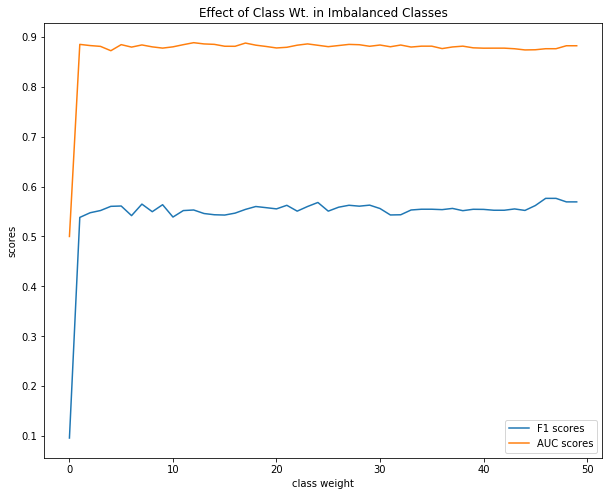

In [43]:
plt.figure(figsize=(10, 8))
plt.plot(class_wts, f1s, label="F1 scores")
plt.plot(class_wts, auc, label="AUC scores")
plt.xlabel("class weight")
plt.ylabel("scores")
plt.title("Effect of Class Wt. in Imbalanced Classes")
plt.legend()
plt.show()

# Sampling Metrics

In [106]:
from os import getcwd ; print(getcwd())
from IPython.display import Image
PATH = "/home/rohan/Pictures/"

/home/rohan/GreyAtom/Hackathon/Team4


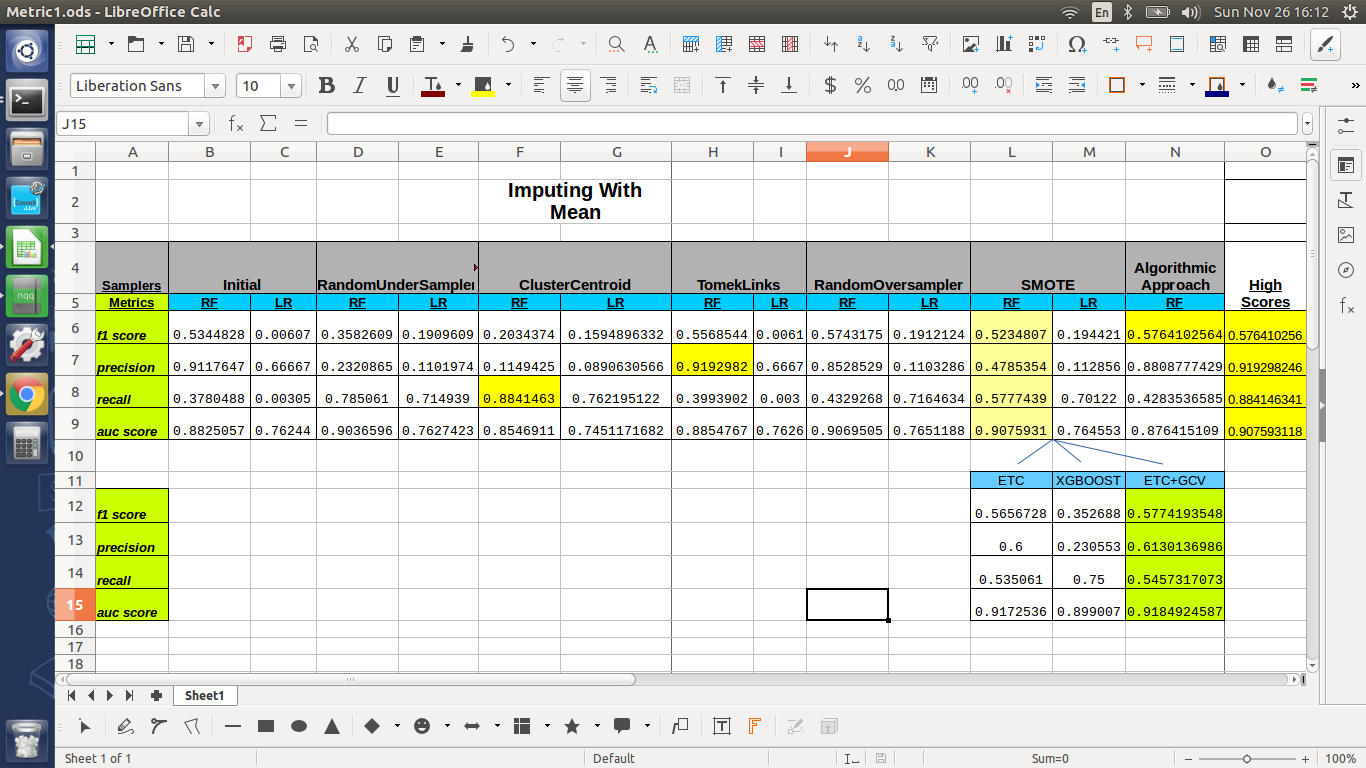

In [107]:
Image(filename = PATH + "metrics.png", width=1000, height=1000)

# Final Model

# We are using samples from SMOTE as it gave us best results

In [44]:
clf1 = ExtraTreesClassifier(n_estimators=250,
                            n_jobs=-1,
                            random_state=9)
clf1.fit(X_sample6, y_sample6)
print "f1_score\t:", f1_score(y_test,clf1.predict(X_test))
print "precision_score\t:",precision_score(y_test, clf1.predict(X_test))
print "recall_score\t:",recall_score(y_test, clf1.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, clf1.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, clf1.predict(X_test))

f1_score	: 0.56567284448
precision_score	: 0.6
recall_score	: 0.53506097561
roc_auc_score	: 0.917253629641
confusion_matrix:
[[12132   234]
 [  305   351]]


In [ ]:
# !pip install xgboost

In [46]:
from xgboost import XGBClassifier

clf2 = XGBClassifier()
clf2.fit(X_sample6, y_sample6)
print "f1_score\t:", f1_score(y_test,clf2.predict(X_test))
print "precision_score\t:",precision_score(y_test, clf2.predict(X_test))
print "recall_score\t:",recall_score(y_test, clf2.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, clf2.predict(X_test))

f1_score	: 0.352688172043
precision_score	: 0.230552952202
recall_score	: 0.75
roc_auc_score	: 0.899007420524
confusion_matrix:
[[10724  1642]
 [  164   492]]


In [52]:
from sklearn.model_selection import GridSearchCV,cross_val_score

est = ExtraTreesClassifier(n_jobs=-1,random_state=9)

params = {
            "n_estimators" : [200,250,300],
            "criterion" : ["gini", "entropy"] 
          }

grid = GridSearchCV(estimator=est,param_grid=params,n_jobs=-1,cv=3)
grid.fit(X_sample6, y_sample6)

grid.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [53]:
print "f1_score\t:", f1_score(y_test,grid.predict(X_test))
print "precision_score\t:",precision_score(y_test, grid.predict(X_test))
print "recall_score\t:",recall_score(y_test, grid.predict(X_test))
print "roc_auc_score\t:",roc_auc_score(y_test, grid.predict_proba(X_test)[:,1])
print "confusion_matrix:\n",confusion_matrix(y_test, grid.predict(X_test))

f1_score	: 0.577419354839
precision_score	: 0.61301369863
recall_score	: 0.545731707317
roc_auc_score	: 0.918492458669
confusion_matrix:
[[12140   226]
 [  298   358]]


In [79]:
best_features = ['Attr27', 'Attr46', 'Attr58', 'Attr34', 'Attr24', 'Attr56', 'Attr35', \
                     'Attr9', 'Attr39', 'Attr29', 'Attr61', 'Attr5', 'Attr55', 'Attr44', \
                     'Attr25', 'Attr6', 'Attr47', 'Attr36']

# Final Prediction

In [100]:
testdf = pd.read_csv('testdata.csv')

X_test_df = testdf.iloc[:,:-1]
X_test_df = X_test_df[best_features]
Y_test_df = testdf.iloc[:,-1]
print Y_test_df

0    1
1    1
2    1
3    0
4    0
5    0
Name: class, dtype: int64


In [98]:
import numpy as np
y_pred = rf6.predict(X_test_df)
print y_pred

[1 1 1 0 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix, accuracy_score
from collections import OrderedDict

rf1 = LogisticRegression(random_state=9)
rf2 = RandomForestClassifier(random_state=9)
rf3 = ExtraTreesClassifier(random_state=9)

def preprocess_and_predict(model, name, X_test):
    print name
    best_features = ['Attr27', 'Attr46', 'Attr58', 'Attr34', 'Attr24', 'Attr56', 'Attr35', \
                     'Attr9', 'Attr39', 'Attr29', 'Attr61', 'Attr5', 'Attr55', 'Attr44', \
                     'Attr25', 'Attr6', 'Attr47', 'Attr36']
    for col in best_features:
        # Outliers to be brought within .05-.95 quantile range
        if(col != 'class'):
            X_test.loc[X_test[col] > final_df[col].quantile(q=0.95), col] = final_df[col].quantile(q=0.95)
            X_test.loc[X_test[col] < final_df[col].quantile(q=0.05), col] = final_df[col].quantile(q=0.05)
        # Fill na values with mean of available data
        X_test[col] = X_test[col].fillna(final_data[col].mean())
        # Scale assuming normal distribution
        X_test[col] = (X_test[col] - final_data[col].mean())/final_data[col].std()
    #X_input = X_test[[attr_list]]
    X_input = X_test
    y_pred = model.predict(X_input)
    y_pred_prob = model.predict_proba(X_input)[:,1]
    return y_pred, y_pred_prob

def predict_and_score (model, name, X_test, y_test):
    print name
    y_pred, y_pred_prob = preprocess_and_predict(model, name, X_test)
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)   
    recall = recall_score(y_test, y_pred)    
    auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    print "f1_score\t:", f1
    print "precision_score\t:",precision
    print "recall_score\t:", recall
    print "roc_auc_score\t:",auc
    print "accuracy:\n", accuracy
    print "confusion_matrix:\n",confusion_matrix(y_test, y_pred) 
    return OrderedDict({"model": name, "f1": f1, "precision" : precision, "recall" : recall, "roc_auc": auc, "accuracy": accuracy})

def sample_and_model(sampler, samplerName, xtrain, ytrain, X_test, y_test):
    print samplerName, "\n"
    X_sample2, y_sample2 =  sampler.fit_sample(xtrain, ytrain)
    
    rows = []
    rf1.fit (X_sample2, y_sample2)
    score1 = predict_and_score (rf1, samplerName + ": LogisticRegression", X_test, y_test)
    rows.append(score1)
    
    rf2.fit (X_sample2, y_sample2)
    score2 = predict_and_score (rf2, samplerName + ": RandomForestClassifier", X_test, y_test) 
    rows.append(score2)
    
    rf3.fit (X_sample2, y_sample2)
    score3 = predict_and_score (rf3, samplerName + ": ExtraTreesClassifier", X_test, y_test) 
    rows.append(score3)
    summary = pd.DataFrame(rows)
    return summary

# The End